In [30]:
pip install pydub ffmpeg-python requests


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import requests
import csv
from datetime import datetime, timedelta

# List of 20 Indian cities with their coordinates
CITIES = [
    {"name": "Mumbai", "lat": 19.0144, "lon": 72.8479},
    {"name": "Delhi", "lat": 28.6139, "lon": 77.2090},
    {"name": "Bangalore", "lat": 12.9716, "lon": 77.5946},
    {"name": "Hyderabad", "lat": 17.3850, "lon": 78.4867},
    {"name": "Chennai", "lat": 13.0827, "lon": 80.2707},
    {"name": "Kolkata", "lat": 22.5726, "lon": 88.3639},
    {"name": "Ahmedabad", "lat": 23.0225, "lon": 72.5714},
    {"name": "Pune", "lat": 18.5204, "lon": 73.8567},
    {"name": "Jaipur", "lat": 26.9124, "lon": 75.7873},
    {"name": "Lucknow", "lat": 26.8467, "lon": 80.9462},
    {"name": "Kanpur", "lat": 26.4499, "lon": 80.3319},
    {"name": "Nagpur", "lat": 21.1458, "lon": 79.0882},
    {"name": "Indore", "lat": 22.7196, "lon": 75.8577},
    {"name": "Thane", "lat": 19.2183, "lon": 72.9781},
    {"name": "Bhopal", "lat": 23.2599, "lon": 77.4126},
    {"name": "Visakhapatnam", "lat": 17.6868, "lon": 83.2185},
    {"name": "Pimpri-Chinchwad", "lat": 18.6279, "lon": 73.8009},
    {"name": "Patna", "lat": 25.5941, "lon": 85.1376},
    {"name": "Vadodara", "lat": 22.3072, "lon": 73.1812},
    {"name": "Ghaziabad", "lat": 28.6692, "lon": 77.4538}
]

def collect_historical_weather_data():
    end_date = datetime.strptime("2025-03-02T05:00", "%Y-%m-%dT%H:%M")
    print(end_date)
    start_date = end_date - timedelta(days=30)
    
    data = []

    for city in CITIES:
        print(f"Collecting data for {city['name']}...")
        
        url = f"https://archive-api.open-meteo.com/v1/archive?latitude={city['lat']}&longitude={city['lon']}&start_date={start_date.strftime('%Y-%m-%d')}&end_date={end_date.strftime('%Y-%m-%d')}&hourly=temperature_2m,relativehumidity_2m,windspeed_10m&timezone=auto"
        
        response = requests.get(url)
        if response.status_code == 200:
            weather_data = response.json()
            hourly_data = weather_data['hourly']
            for i in range(len(hourly_data['time'])):
                data.append({
                    "timestamp": hourly_data['time'][i],
                    "city": city["name"],
                    "temperature": hourly_data['temperature_2m'][i],
                    "humidity": hourly_data['relativehumidity_2m'][i],
                    "wind_speed": hourly_data['windspeed_10m'][i]
                })
        else:
            print(f"Error fetching data for {city['name']}: {response.status_code}")

    # Save data to CSV file
    with open("IndiaClimate20_historical_data.csv", "w", newline="") as csvfile:
        fieldnames = ["timestamp", "city", "temperature", "humidity", "wind_speed"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

    print(f"Historical data collected and saved for the last month.")

if __name__ == "__main__":
    collect_historical_weather_data()


2025-03-02 05:00:00
Historical data collected and saved for the last month.


In [ ]:
import pandas as pd 

In [33]:
df = pd.read_csv("IndiaClimate20_historical_data.csv")

In [36]:
import warnings

warnings.filterwarnings('ignore')

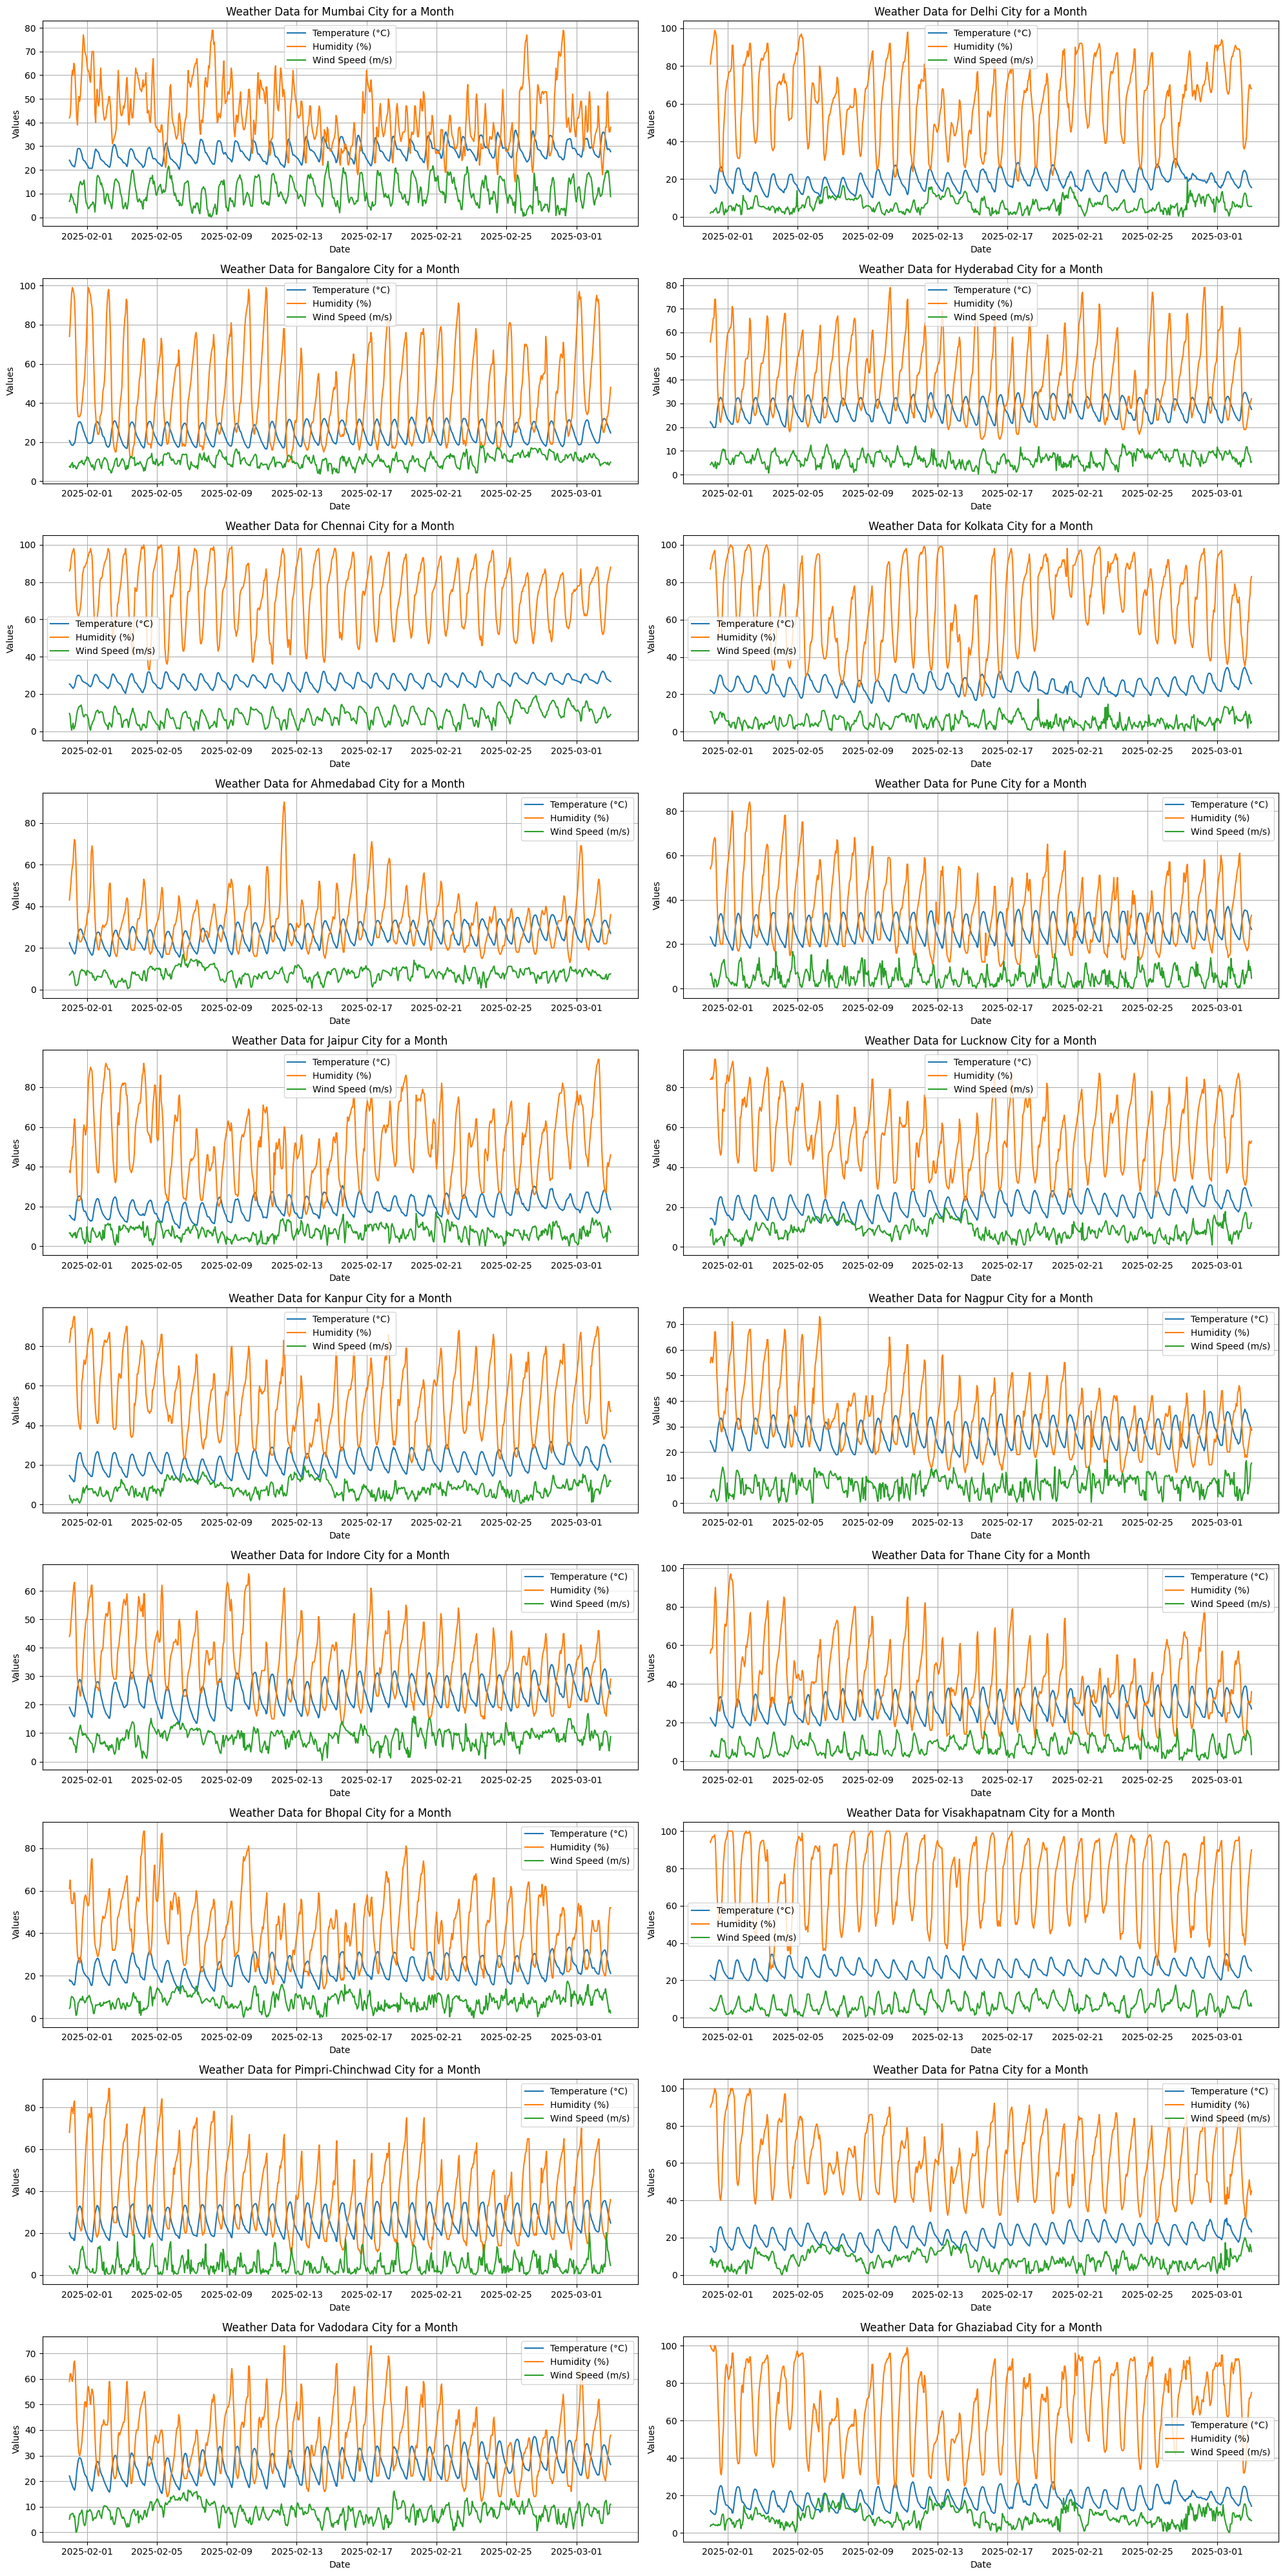

In [ ]:
import matplotlib.pyplot as plt

# Get the list of unique cities
cities = df['city'].unique()

fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(20, 40))
axes = axes.flatten()


for i, city in enumerate(cities):
    city_data = df[df['city'] == city]
    
    city_data['timestamp'] = pd.to_datetime(city_data['timestamp'])
    
    axes[i].plot(city_data['timestamp'], city_data['temperature'], label='Temperature (°C)')
    axes[i].plot(city_data['timestamp'], city_data['humidity'], label='Humidity (%)')
    axes[i].plot(city_data['timestamp'], city_data['wind_speed'], label='Wind Speed (m/s)')
    
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Values')
    axes[i].set_title(f'Weather Data for {city} City for a Month')
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()